<a href="https://colab.research.google.com/github/Bitang-Melyen-Tanulok/Csip_Csip/blob/main/sample_train_spectrograms_20_whole_newSg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/DeepLearning'

Mounted at /content/drive


In [2]:
# Turns audio to spectrograms and saves them to the given folder
def save_spectrogram_to_disk(path_to_audio, path_to_spectrogram_ogg, sample_duration_sec=5.0, hop_length_sec=2.5):
  audio_data, audio_rate = librosa.load(path_to_audio)

  sample_duration_frames = int(sample_duration_sec * audio_rate)
  hop_length_frames = int(hop_length_sec * audio_rate)

  n_fft = 2048
  hop_length = 512
  n_mels = 128
  # win_length is automatically equal to n_fft

  # Pad audio with zeros if smaller than sample_duration_sec
  if len(audio_data) < sample_duration_frames:
    audio_data = librosa.util.fix_length(audio_data, size=sample_duration_frames)

  # Divide the audio into sample_duration_sec seconds long samples
  for i, sample_start in tqdm(enumerate(range(0, len(audio_data), hop_length_frames))):
    if not os.path.exists(path_to_spectrogram_ogg.split('.')[0]+f'_{i}.png'):
      sample_end = min(sample_start+sample_duration_frames, len(audio_data)-1)
      sample = audio_data[sample_start:sample_end]

      # If the sample is the remainder of dividing the audio, thus smaller than the sample duration sould be, we discard the sample
      # The end of the audio containing crucial data is highly unlikely
      if len(sample) < sample_duration_frames:
        continue

      # Generate mel spectrogram
      S = librosa.feature.melspectrogram(
          y=sample,
          sr=audio_rate,
          n_fft=n_fft,
          hop_length=hop_length,
          n_mels=n_mels,
          fmin=40, # [2024 1st place]
          fmax=16000, # Bird calls are usually high pitched, we don't want to remove those frequencies
      )

      # Convert to decibel scale
      S_db = librosa.power_to_db(S, ref=np.max)

      # Convert spectrogram into an image
      # img = librosa.display.specshow(S_db, sr=audio_rate, x_axis='time', y_axis='mel')

      spectrogram_file_path = path_to_spectrogram_ogg.split('.')[0]+f'_{i}.png'

      img = librosa.display.specshow(S_db, sr=audio_rate, hop_length=hop_length, cmap='gray')

      plt.axis('off')
      plt.savefig(spectrogram_file_path, bbox_inches='tight', pad_inches=0)

current folder: blrwar1


57it [00:00, 3822.94it/s]
51it [00:00, 3429.47it/s]
64it [00:00, 3004.28it/s]
58it [00:00, 2945.62it/s]
19it [00:00, 3450.01it/s]
57it [00:12,  4.68it/s]
56it [00:00, 3403.43it/s]
47it [00:00, 3261.94it/s]
14it [00:00, 2265.88it/s]
20it [00:00, 2594.76it/s]
10it [00:00, 2492.75it/s]
16it [00:00, 3060.56it/s]
57it [00:00, 3510.55it/s]
104it [00:00, 3715.41it/s]
84it [00:00, 3365.48it/s]
38it [00:00, 3514.91it/s]
213it [00:00, 3151.44it/s]
11it [00:00, 2798.92it/s]
71it [00:00, 3849.98it/s]
40it [00:00, 3535.92it/s]
14it [00:00, 2192.69it/s]
183it [00:00, 3772.52it/s]
16it [00:00, 2683.28it/s]
4it [00:00, 1581.26it/s]
57it [00:00, 3500.99it/s]
27it [00:00, 3278.13it/s]
3it [00:00, 1149.54it/s]
11it [00:00, 1918.15it/s]
53it [00:00, 3522.39it/s]
41it [00:00, 3147.32it/s]
22it [00:00, 2929.36it/s]
5it [00:00, 1820.92it/s]
29it [00:00, 3050.10it/s]
6it [00:00, 1660.89it/s]
20it [00:00, 2735.39it/s]
26it [00:00, 2611.58it/s]
29it [00:00, 3191.17it/s]
6it [00:00, 1788.36it/s]
8it [00:00, 2245

KeyboardInterrupt: 

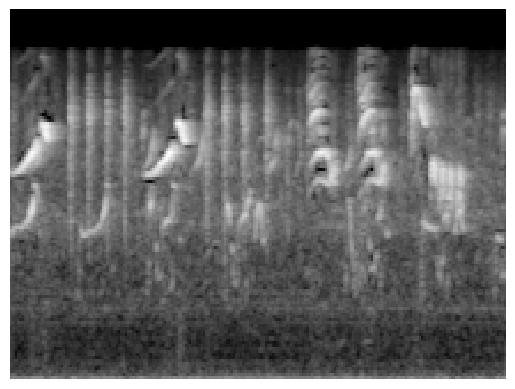

In [3]:
folders = os.listdir(path+'/sample_train_audio')

for j, folder in enumerate(folders):
  # if (j >= 5): break # for now, we only create spectrograms for audio in the first 5 folders

  print("current folder:", folder)
  folder_path = path+'/sample_train_audio/'+folder+'/'

  spectrogram_folder_path = path+'/sample_train_spectrograms_20_whole_newSg/'+folder+'/'
  if not os.path.exists(spectrogram_folder_path):
    os.makedirs(spectrogram_folder_path)

  files = os.listdir(folder_path)

  for i, file in enumerate(files):
    spname = file.replace(".ogg", ".png")
    if not os.path.exists(spectrogram_folder_path+spname):
      # if (i >= 20): break # for now, we only look at the first 20 elements of a folder (maximum)
      save_spectrogram_to_disk(folder_path+file, spectrogram_folder_path+file)